# Machine Learning Internship(Bharat Intern)


## Topic : Boston house price prediction

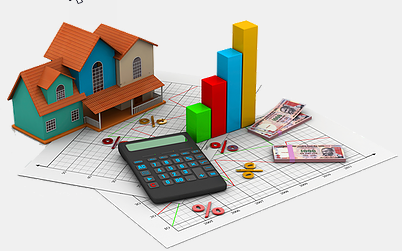

### Overview

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

### Objective

To create a machine learning model to predict MEDV from the given data by using Linear regression model.


Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Now we will load that we will be using to train our model

Here we are using boston house pricing dataset which is available in the sklearn library itself 

In [8]:
df =pd.read_csv("C:/Users/Bilbin T L/Downloads/boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Exploratory Data Analysis

In [25]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

1.CRIM - per capita crime rate by town

2.ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3.INDUS: proportion of non-retail business acres per town

4.CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5.NOX: nitric oxides concentration (parts per 10 million)

6.RM: average number of rooms per dwelling

7.AGE: proportion of owner-occupied units built prior to 1940

8.DIS: weighted distances to ﬁve Boston employment centers

9.RAD: index of accessibility to radial highways

10.TAX: full-value property-tax rate per 10,000 doller

11.PTRATIO: pupil-teacher ratio by town

12.B: (1000(Bk−0.63)2) where Bk is the proportion of blacks by

13.LSTAT: % lower status of the population

14.MEDV: Median value of owner-occupied homes in 1000 doller

In [11]:
df.info()#Info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We convert our dataset into the pandas dataframe,so that it is easier to analyse the data

Adding new column of target values to the dataframe 

In [15]:

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Check if the dataset contains any null value or not

In [16]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


isnull return True or False for each of the cell in the dataframe,but we can't go exploring all the cells to look for True values if any ,so we use sum() function to count all the cells with True value(i.e.Null cells)

In [17]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

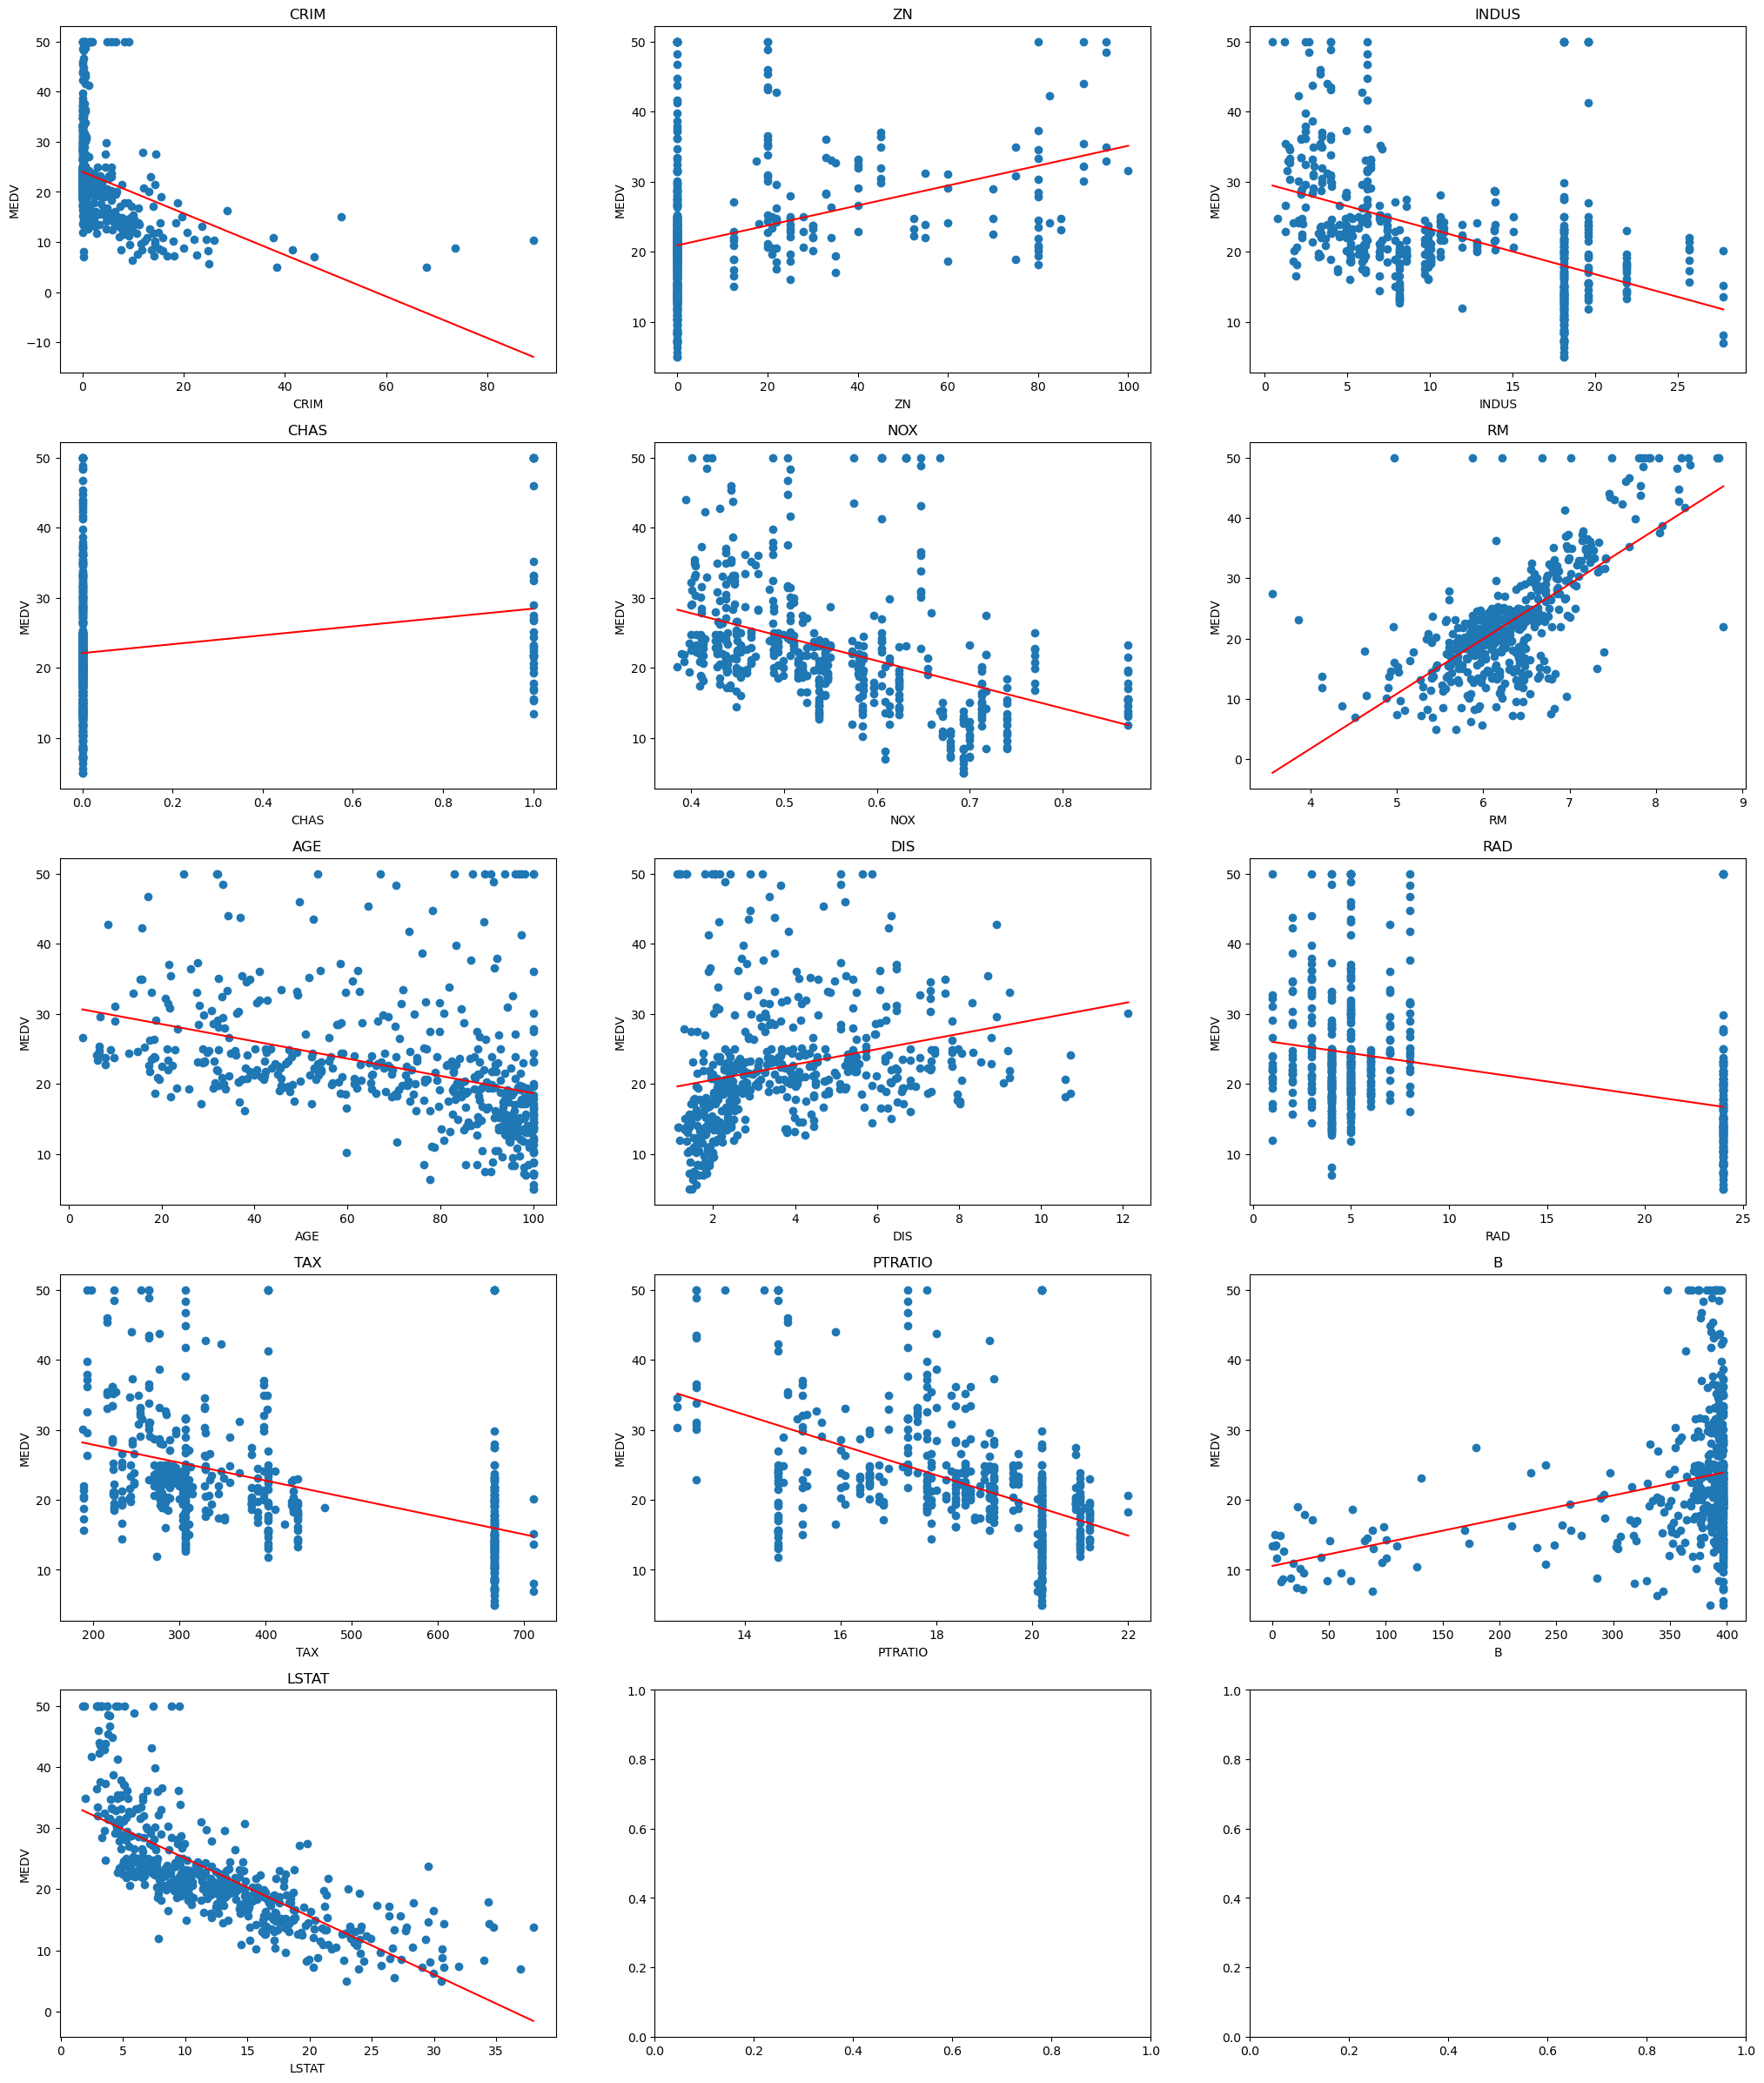

In [28]:
# Create a figure and axis for the scatter plots
fig, axs = plt.subplots(5, 3, figsize=(25, 30))
axs = axs.ravel()

# Plot each feature against the target variable
for i, column in enumerate(df.columns[:-1]):
    axs[i].scatter(df[column], df["MEDV"])
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("MEDV")
    
    # calculate the slope and intercept of the line of best fit
    slope, intercept = np.polyfit(df[column], df["MEDV"], 1)
    x = np.linspace(df[column].min(), df[column].max(), 100)
    y = slope * x + intercept
    
    # plot the line of best fit
    axs[i].plot(x, y, '-r')
    
plt.show()

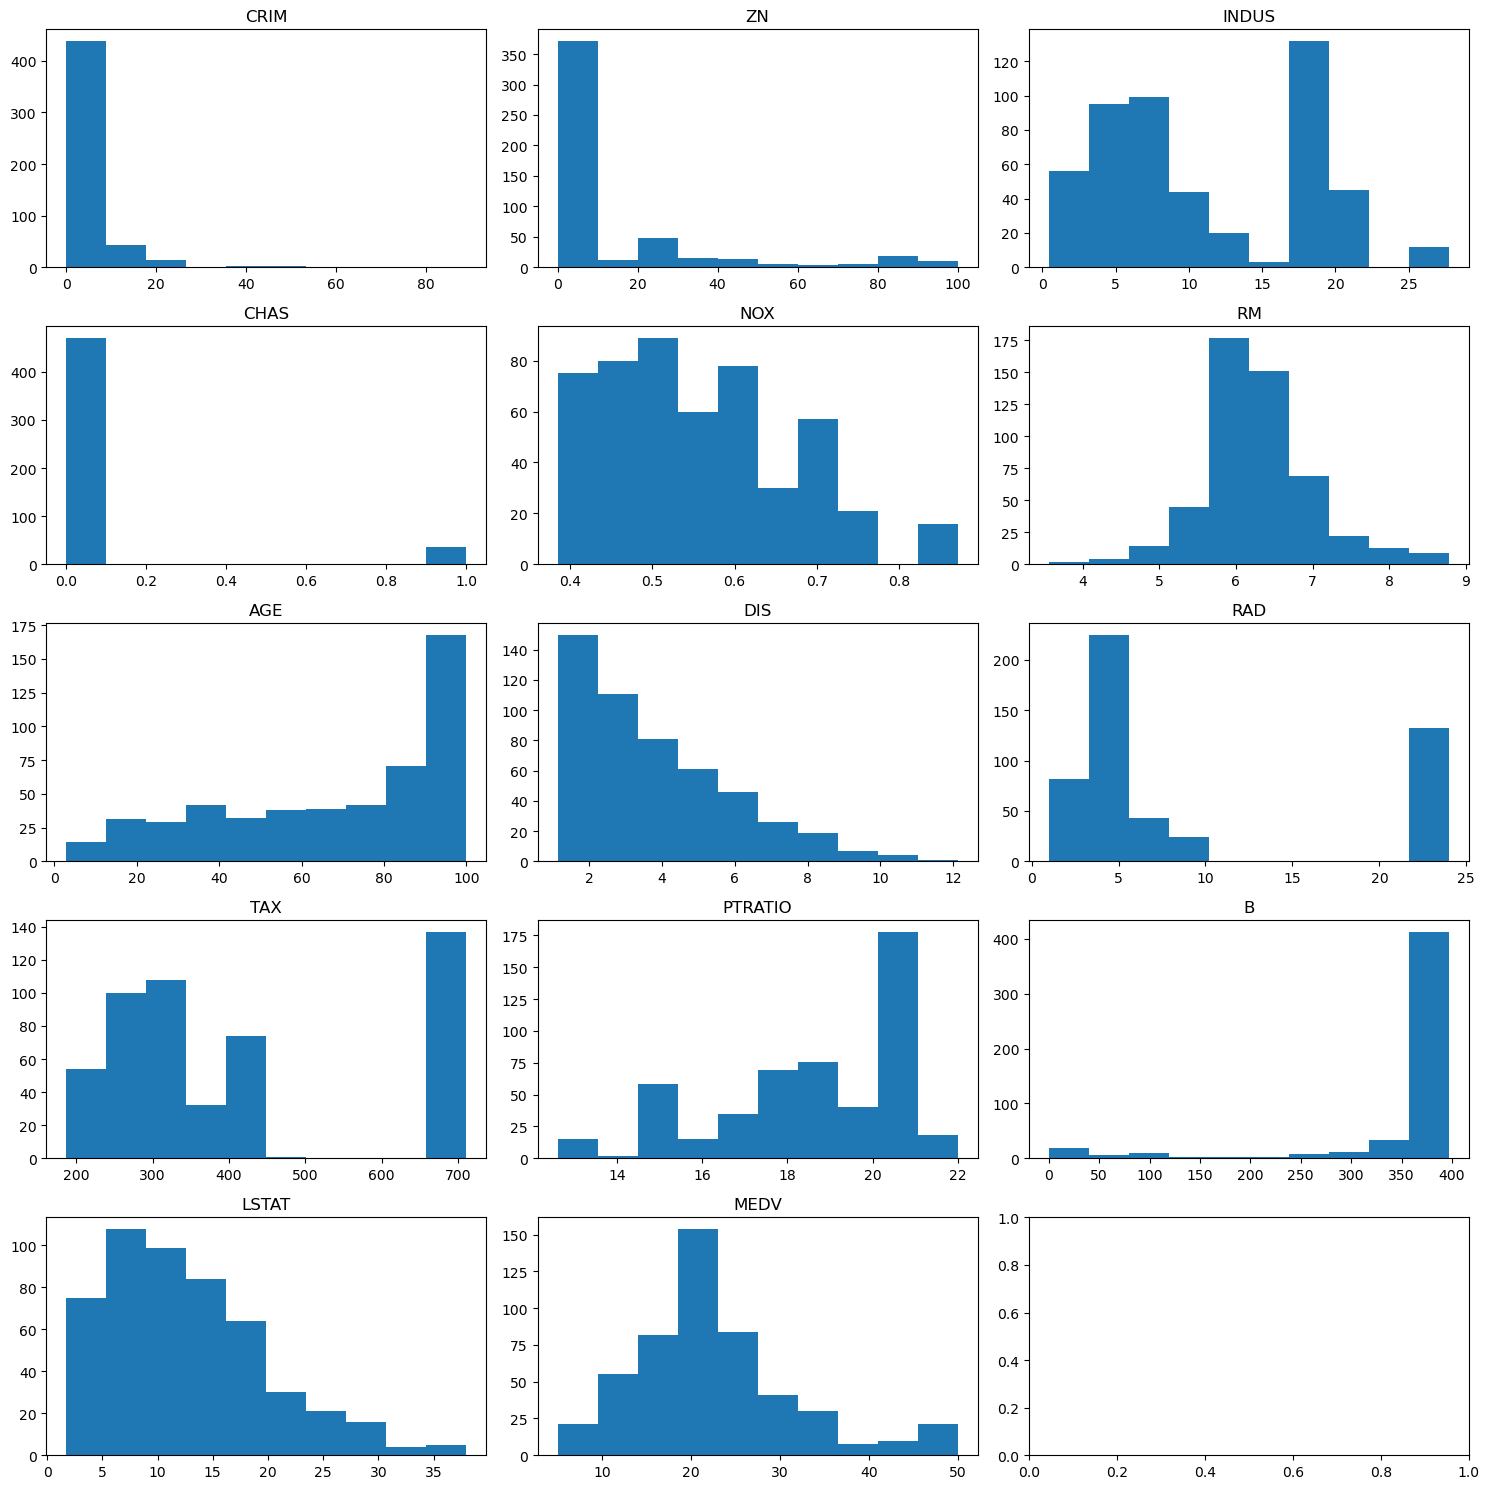

In [29]:
# Create a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
axs = axs.ravel()

# Plot each histogram in the corresponding subplot
for i, feature in enumerate(df.columns):
    axs[i].hist(df[feature])
    axs[i].set_title(feature)
    
plt.tight_layout()
plt.show()

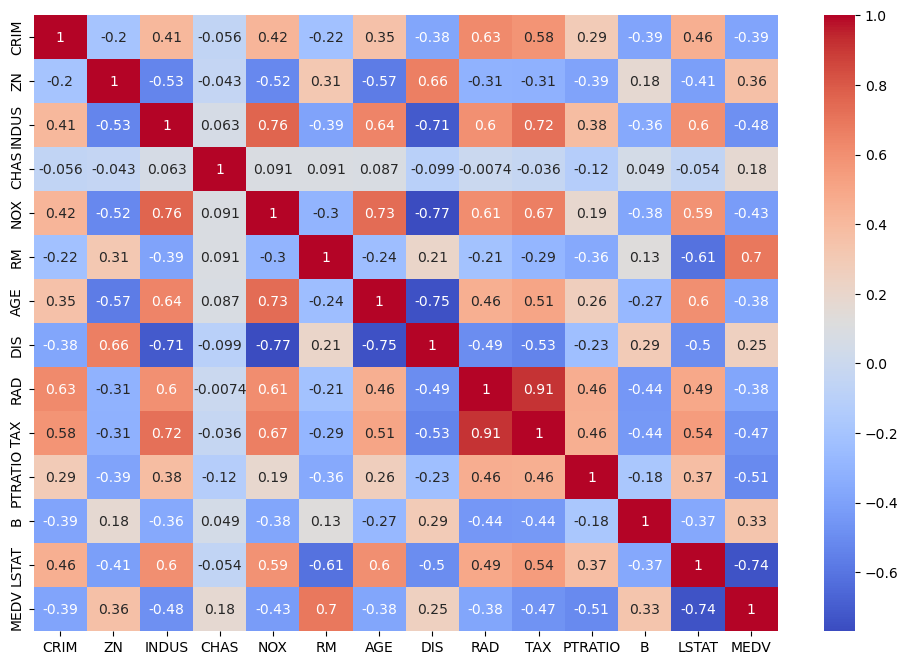

In [30]:
# Create a correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### Splitting the dataset into Training and Testing Data   

In [18]:
from sklearn.model_selection import train_test_split
X=df.drop('MEDV',axis=1)
Y=df['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


## Linear Regression model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [21]:
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("/n")
#on testing set
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 4.710901797319796
/n
The model performance for testing set
RMSE is 4.687543527902958
